## S&P 500 Clustering Project

The purpose of this project is to see if Sectors and Industries can be clustered around financial metrics.

Does <b>Market Capitalization</b> or <b>Revenue</b> indicate which <b>Sector</b> or <b>Industry</b> a company is catagorized in?

In [1]:
#Set Project Directory
cd C:\\Users\\Watson Turbo\Desktop\SP500_Clustering

SyntaxError: invalid syntax (<ipython-input-1-61eb21cfb757>, line 2)

In [2]:
#Import basic librarires
import pandas as pd
import numpy as np
import seaborn as sns

<b>The S&P 500 data was filtered from Fidelity around April 3rd, 2020

In [3]:
#Read the data saved to Github
sp = pd.read_csv('https://raw.githubusercontent.com/YMandCL/Top-500-Companies-to-Apply-to/master/Fidelity_500.csv')
sp.head()

,Symbol,Company Name,Security Type,Security Price,Market Capitalization,Revenue (TTM),Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,--,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
1,BRK/B,Berkshire Hathaway Inc,Common Stock,178.34,$438.08B,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,$955.58B,280522.0,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,$1.07T,267683.0,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
4,CVS,CVS Health Corp,Common Stock,55.72,$72.14B,256776.0,Health Care,Health Care Providers & Services,Health Care Services,United States of America


In [4]:
#Columns and Rows
sp.shape

(500, 10)

In [8]:
#rename colummns for streamlined code
sp.rename(columns={'Security Price':'Price', 'Market Capitalization':'Cap', 'Revenue (TTM)':'Rev'}, inplace=True)

In [9]:
sp.dtypes

Symbol                            object
Company Name                      object
Security Type                     object
Price                            float64
Cap                               object
Rev                              float64
Sector                            object
Industry                          object
Sub-Industry                      object
Company Headquarters Location     object
dtype: object

In [10]:
#To clean non-numeric data from Market Cap column
sp['Cap'] = sp['Cap'].str.replace(r'$', '')

In [11]:
sp['Cap'] = sp['Cap'].str.replace(r'--', '0')

In [12]:
sp.head()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
1,BRK/B,Berkshire Hathaway Inc,Common Stock,178.34,438.08B,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955.58B,280522.0,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,1.07T,267683.0,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
4,CVS,CVS Health Corp,Common Stock,55.72,72.14B,256776.0,Health Care,Health Care Providers & Services,Health Care Services,United States of America


In [13]:
#To clean non-numeric data from Market Cap column
#Import Regular Expression library convert trillions to 12 digits, etc.
import re as re

lst = sp['Cap']
table = {'M':1_000, 'B':1_000, 'T':1_000_000}

new_lst = [int(i) for i in (re.sub(r'([\d\.]+)(K|M|B|T)', lambda v: str(int(float(v.groups()[0]) * table[v.groups()[1]])), i) for i in lst)]

In [14]:
new_lst

[0,
 438080,
 955580,
 1070000,
 72140,
 171050,
 227940,
 22860,
 17260,
 208640,
 768890,
 771510,
 128720,
 17290,
 62890,
 13550,
 269880,
 143270,
 35810,
 25470,
 1180000,
 228500,
 13770,
 8410,
 24900,
 181760,
 195270,
 156490,
 22810,
 53470,
 82940,
 16990,
 112540,
 60300,
 27080,
 69390,
 350520,
 47580,
 97580,
 74340,
 173190,
 4230,
 23390,
 79700,
 63220,
 233160,
 451160,
 25680,
 30470,
 282510,
 172290,
 39650,
 18600,
 19120,
 21010,
 99110,
 22200,
 14040,
 54240,
 54040,
 64220,
 181900,
 168790,
 28400,
 18490,
 62090,
 14580,
 195170,
 4310,
 91480,
 72330,
 27350,
 13530,
 5880,
 19760,
 20780,
 52510,
 124940,
 5540,
 157420,
 37050,
 44760,
 43710,
 667380,
 188110,
 4660,
 1460,
 94440,
 15310,
 33730,
 20060,
 52750,
 3790,
 1000,
 111110,
 19220,
 31550,
 36730,
 79320,
 140010,
 24830,
 115670,
 32560,
 4120,
 12130,
 7850,
 10370,
 40230,
 50120,
 76340,
 3460,
 124280,
 3330,
 72300,
 21080,
 114660,
 1380,
 58190,
 30090,
 82260,
 474540,
 705650,
 12

In [15]:
sp['Cap'] = new_lst

In [16]:
sp.head()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
1,BRK/B,Berkshire Hathaway Inc,Common Stock,178.34,438080,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955580,280522.0,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,1070000,267683.0,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
4,CVS,CVS Health Corp,Common Stock,55.72,72140,256776.0,Health Care,Health Care Providers & Services,Health Care Services,United States of America


In [17]:
sp.describe()

,Price,Cap,Rev
count,500.000000,5.000000e+02,500.000000
mean,623.467459,7.411485e+04,28254.492616
std,11981.268476,1.714319e+05,43695.541307
min,0.174400,0.000000e+00,5791.000000
25%,18.152500,5.440000e+03,8486.500000
50%,40.840000,1.516500e+04,12871.000000
75%,83.547500,5.227000e+04,23651.109250
max,267954.000000,1.180000e+06,327223.000000


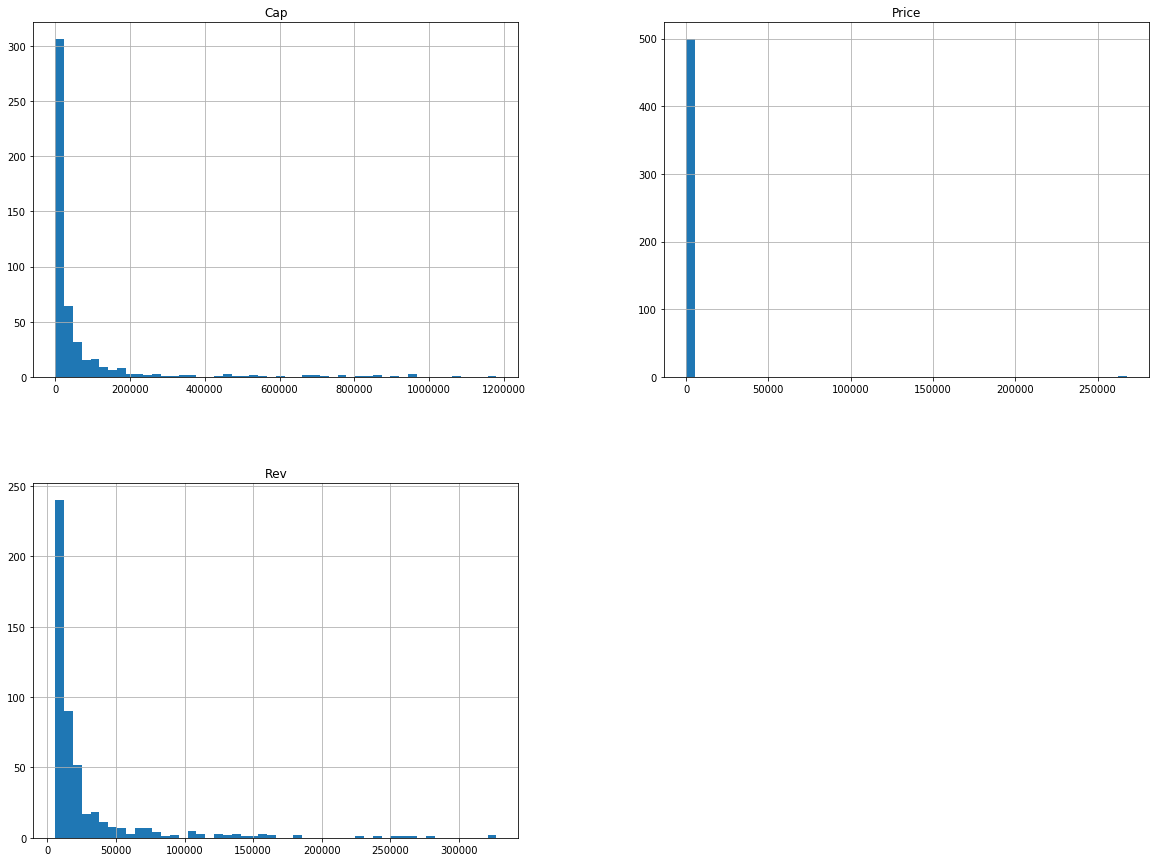

In [18]:
#Create Histogram
%matplotlib inline
import matplotlib.pyplot as plt
sp.hist(bins=50, figsize=(20,15))
plt.show()

## It appears one of the Stock prices are close to $27,000/share! 
One guess...Berkshire Hathway.

In [19]:
#To list the top 5 stock prices
sp.nlargest(5, 'Price')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.000,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
450,SEB,Seaboard Corp,Common Stock,2744.36,3180,6840.000,Consumer Staples,Food Products,Packaged Foods & Meats,United States of America
420,NVR,NVR Inc.,Common Stock,2362.94,8610,7428.442,Consumer Discretionary,Household Durables,Homebuilding,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955580,280522.000,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
212,BKNG,Booking Holdings Inc,Common Stock,1231.81,52190,15066.000,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America


In [20]:
#To list the top 5 stock prices
sp.nlargest(5, 'Cap')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
20,MSFT,Microsoft Corp,Common Stock,153.83,1180000,134249.000,Information Technology,Software,Systems Software,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,1070000,267683.000,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955580,280522.000,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
414,DCP,DCP Midstream LP,Unit Trust Fund,4.62,952070,7638.000,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Storage & Transportation,United States of America
379,WCC,WESCO International Inc,Common Stock,21.47,950880,8358.917,Industrials,Trading Companies & Distributors,Trading Companies & Distributors,United States of America


In [21]:
#To list the top 5 stock prices
sp.nlargest(5, 'Rev')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
1,BRK/B,Berkshire Hathaway Inc,Common Stock,178.34,438080,327223.0,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955580,280522.0,Consumer Discretionary,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,1070000,267683.0,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
4,CVS,CVS Health Corp,Common Stock,55.72,72140,256776.0,Health Care,Health Care Providers & Services,Health Care Services,United States of America


In [22]:
#To list the top 5 stock prices
sp.nsmallest(5, 'Price')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
374,CHK,Chesapeake Energy Corp,Common Stock,0.17440,327680,8489.0,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,United States of America
287,JCP,J.C. Penney Company Inc.,Common Stock,0.27040,95030,11167.0,Consumer Discretionary,Multiline Retail,Department Stores,United States of America
383,FTR,Frontier Communications Corp,Common Stock,0.36245,37930,8289.0,Communication Services,Diversified Telecommunication Services,Integrated Telecommunication Services,United States of America
478,RRD,R.R. Donnelley & Sons Co,Common Stock,0.91980,71610,6276.2,Industrials,Commercial Services & Supplies,Commercial Printing,United States of America
491,ENLC,Enlink Midstream LLC,Unit Trust Fund,1.09000,526820,6052.9,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Storage & Transportation,United States of America


In [23]:
#To list the top 5 stock prices
sp.nsmallest(5, 'Cap')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.000,Financials,Diversified Financial Services,Multi-Sector Holdings,United States of America
419,ARNC,Arconic Corp,Common Stock,6.20,0,7442.000,Materials,Metals & Mining,Aluminum,United States of America
93,PAGP,Plains GP Holdings LP,Common Stock,5.67,1000,33669.000,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Storage & Transportation,United States of America
498,RUSHB,Rush Enterprises Inc,Common Stock,26.50,1020,5809.847,Industrials,Trading Companies & Distributors,Trading Companies & Distributors,United States of America
443,BECN,Beacon Roofing Supply Inc,Common Stock,13.31,1030,7058.596,Industrials,Trading Companies & Distributors,Trading Companies & Distributors,United States of America


In [24]:
#To list the top 5 stock prices
sp.nsmallest(5, 'Rev')

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
499,AMTD,TD AMERITRADE Holding Corp,Common Stock,34.81,19250,5791.000,Financials,Capital Markets,Investment Banking & Brokerage,United States of America
497,RUSHA,Rush Enterprises Inc,Common Stock,28.93,1080,5809.847,Industrials,Trading Companies & Distributors,Trading Companies & Distributors,United States of America
498,RUSHB,Rush Enterprises Inc,Common Stock,26.50,1020,5809.847,Industrials,Trading Companies & Distributors,Trading Companies & Distributors,United States of America
496,CMC,Commercial Metals Co,Common Stock,14.63,1870,5874.548,Materials,Metals & Mining,Steel,United States of America
495,WSM,Williams-Sonoma Inc.,Common Stock,38.19,2940,5898.008,Consumer Discretionary,Specialty Retail,Homefurnishing Retail,United States of America


## <font color = red>Berkshire Hathaway shares are not listing Market Cap. Note for removal.

In [25]:
#Check columns for null
display(sp.isnull().any())

Symbol                           False
Company Name                     False
Security Type                    False
Price                            False
Cap                              False
Rev                              False
Sector                           False
Industry                         False
Sub-Industry                     False
Company Headquarters Location    False
dtype: bool

Text(0, 0.5, 'Market Cap')

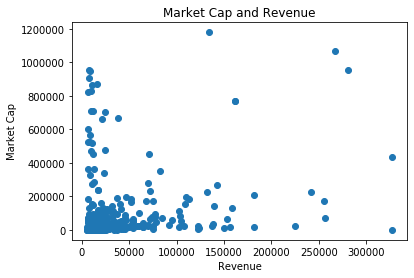

In [27]:
#Scatterplot
y=sp["Cap"]
x=sp["Rev"]
plt.scatter(x,y)

plt.title("Market Cap and Revenue")
plt.xlabel("Revenue")
plt.ylabel("Market Cap")

In [34]:
sp.groupby('Sector').count()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Industry,Sub-Industry,Company Headquarters Location
Sector,,,,,,,,,
Communication Services,31,31,31,31,31,31,31,31,31
Consumer Discretionary,86,86,86,86,86,86,86,86,86
Consumer Staples,42,42,42,42,42,42,42,42,42
Energy,39,39,39,39,39,39,39,39,39
Financials,67,67,67,67,67,67,67,67,67
Health Care,43,43,43,43,43,43,43,43,43
Industrials,75,75,75,75,75,75,75,75,75
Information Technology,48,48,48,48,48,48,48,48,48
Materials,33,33,33,33,33,33,33,33,33


In [36]:
print('There are {} uniques Sectors.'.format(len(sp['Sector'].unique())))

There are 11 uniques categories.


In [37]:
sp.groupby('Industry').count()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Sub-Industry,Company Headquarters Location
Industry,,,,,,,,,
Aerospace & Defense,11,11,11,11,11,11,11,11,11
Air Freight & Logistics,5,5,5,5,5,5,5,5,5
Airlines,6,6,6,6,6,6,6,6,6
Auto Components,6,6,6,6,6,6,6,6,6
Automobiles,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
"Textiles, Apparel & Luxury Goods",6,6,6,6,6,6,6,6,6
Thrifts & Mortgage Finance,2,2,2,2,2,2,2,2,2
Tobacco,2,2,2,2,2,2,2,2,2


In [40]:
print('There are {} uniques Industries.'.format(len(sp['Industry'].unique())))

There are 61 uniques Industries.


In [41]:
sp.groupby('Sub-Industry').count()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Company Headquarters Location
Sub-Industry,,,,,,,,,
Advertising,2,2,2,2,2,2,2,2,2
Aerospace & Defense,11,11,11,11,11,11,11,11,11
Agricultural & Farm Machinery,2,2,2,2,2,2,2,2,2
Agricultural Products,3,3,3,3,3,3,3,3,3
Air Freight & Logistics,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
Tires & Rubber,1,1,1,1,1,1,1,1,1
Tobacco,2,2,2,2,2,2,2,2,2
Trading Companies & Distributors,9,9,9,9,9,9,9,9,9


In [42]:
print('There are {} uniques Sub-Industries.'.format(len(sp['Sub-Industry'].unique())))

There are 118 uniques Sub-Industries.


## "One Hot Encoding" to numerically weigh catagorical data

## Let's Start with Sector to keep things simple

In [43]:
# one hot encoding
onehot = pd.get_dummies(sp[['Sector']], prefix="", prefix_sep="")

In [50]:
#Add Sector back into main dataframe column
sp['Sector']= onehot

In [52]:
sp.head()

,Symbol,Company Name,Security Type,Price,Cap,Rev,Sector,Industry,Sub-Industry,Company Headquarters Location
0,BRK/A,Berkshire Hathaway Inc,Common Stock,267954.00,0,327223.0,0,Diversified Financial Services,Multi-Sector Holdings,United States of America
1,BRK/B,Berkshire Hathaway Inc,Common Stock,178.34,438080,327223.0,0,Diversified Financial Services,Multi-Sector Holdings,United States of America
2,AMZN,Amazon.com Inc,Common Stock,1906.59,955580,280522.0,0,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,United States of America
3,AAPL,Apple Inc,Common Stock,241.41,1070000,267683.0,0,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",United States of America
4,CVS,CVS Health Corp,Common Stock,55.72,72140,256776.0,0,Health Care Providers & Services,Health Care Services,United States of America


In [53]:
onehot.head()

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities,Sector
0,0,0,0,0,1,0,0,0,0,0,0,Financials
1,0,0,0,0,1,0,0,0,0,0,0,Financials
2,0,1,0,0,0,0,0,0,0,0,0,Consumer Discretionary
3,0,0,0,0,0,0,0,1,0,0,0,Information Technology
4,0,0,0,0,0,1,0,0,0,0,0,Health Care
